In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import os 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_error

random.seed(5)


In [2]:
#dir = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data_updated_csv/"
dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [3]:
df = pd.DataFrame(columns=["Date","Rain"])
x = np.array([])
for filename in os.listdir(os.path.join(dir, "NE_csv/")):
    data = pd.read_csv(os.path.join(dir, "NE_csv/" + filename))
    x = np.array(data[data["X"] == 91.5][data["Y"] == 25.25].values[0][3:])
    x = x[np.logical_not(np.isnan(x))]
    df2 = pd.DataFrame(columns=["Date","Rain"])
    df2["Date"] = pd.date_range(filename[0:4]+'-01-01', periods=len(x), freq='D')
    df2["Rain"] = x

    df = df.append(df2)

df.sort_values(by="Date", inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
"""#Updated data
files = sorted(os.listdir(dir))
df = pd.DataFrame(columns=["date","rain"])
for filename in files:
    data = pd.read_csv(os.path.join(dir ,filename))
    x = data[data["lon"] == 91.5][data["lat"] == 25.25]
    x = x.dropna()
    x = x[["date","rain"]]
    df = df.append(x)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.rename(columns={'date': 'Date', 'rain': 'Rain'}, inplace=True)
df.sort_values(by="Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(),df.tail()"""

'#Updated data\nfiles = sorted(os.listdir(dir))\ndf = pd.DataFrame(columns=["date","rain"])\nfor filename in files:\n    data = pd.read_csv(os.path.join(dir ,filename))\n    x = data[data["lon"] == 91.5][data["lat"] == 25.25]\n    x = x.dropna()\n    x = x[["date","rain"]]\n    df = df.append(x)\n\ndf[\'date\'] = pd.to_datetime(df[\'date\'], format=\'%Y-%m-%d\')\ndf.rename(columns={\'date\': \'Date\', \'rain\': \'Rain\'}, inplace=True)\ndf.sort_values(by="Date", inplace=True)\ndf.reset_index(drop=True, inplace=True)\ndf.head(),df.tail()'

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import seaborn as sns

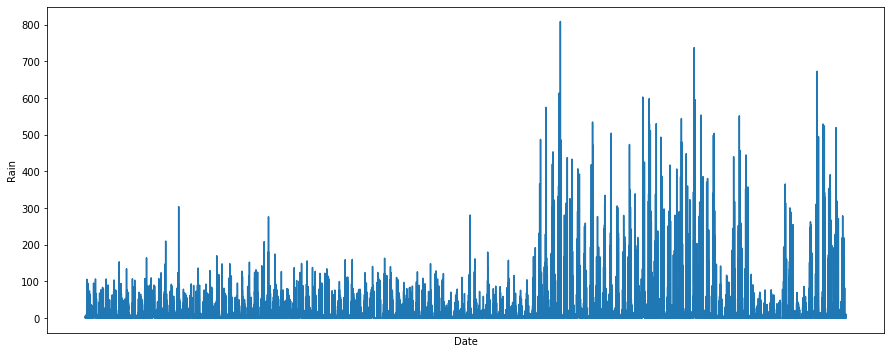

In [9]:
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='Date',y='Rain')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [10]:
# Augmented Dickey-Fuller Test
result = adfuller (df['Rain'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -14.977773
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [11]:
#Kwiatkowski Phillips Schmidt Shin (KPSS) test
result_kpss_ct=kpss(df['Rain'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))


Test Statistic: 0.324466
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [12]:
#Converting series to stationary
df_stat = df[["Rain","Date"]]
df_stat["Rain"]=np.sqrt(df['Rain'])
df_stat["Rain"]=df_stat["Rain"].diff()
df_stat.dropna(inplace=True)

In [13]:
df_stat

,Rain,Date
1,-1.304855,1901-01-02
2,0.000000,1901-01-03
3,1.076026,1901-01-04
4,-1.076026,1901-01-05
5,0.000000,1901-01-06
...,...,...
42976,0.000000,2018-12-26
42977,0.000000,2018-12-27
42978,0.000000,2018-12-28
42979,0.000000,2018-12-29


In [14]:
#Checking the stationarity
result=adfuller(df_stat["Rain"])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -49.849549
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [15]:
result_kpss_ct_log=kpss(df_stat["Rain"],regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.070000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


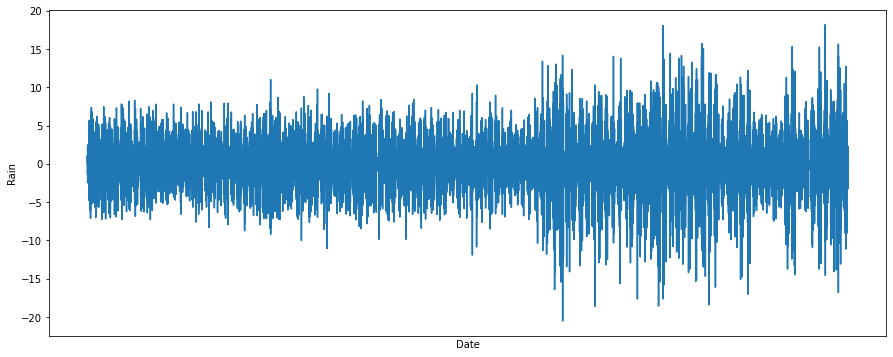

In [16]:
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df_stat,x='Date',y='Rain')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [17]:
split_index = df_stat.loc[df_stat['Date']==pd.to_datetime('2002-06-23', format='%Y-%m-%d')].index[0]
train_df, test_df = df_stat[:split_index+1], df_stat[split_index+1:]
train_len = len(train_df)
test_len = len(test_df)
train_df, test_df

(           Rain       Date
 1     -1.304855 1901-01-02
 2      0.000000 1901-01-03
 3      1.076026 1901-01-04
 4     -1.076026 1901-01-05
 5      0.000000 1901-01-06
 ...         ...        ...
 36959 -6.044473 2002-06-20
 36960 -3.949150 2002-06-21
 36961  4.847387 2002-06-22
 36962 -2.621469 2002-06-23
 36963 -0.850526 2002-06-24
 
 [36963 rows x 2 columns],
            Rain       Date
 36964  0.233538 2002-06-25
 36965  1.721636 2002-06-26
 36966  3.736964 2002-06-27
 36967 -1.015702 2002-06-28
 36968  4.723872 2002-06-29
 ...         ...        ...
 42976  0.000000 2018-12-26
 42977  0.000000 2018-12-27
 42978  0.000000 2018-12-28
 42979  0.000000 2018-12-29
 42980  0.000000 2018-12-30
 
 [6017 rows x 2 columns])

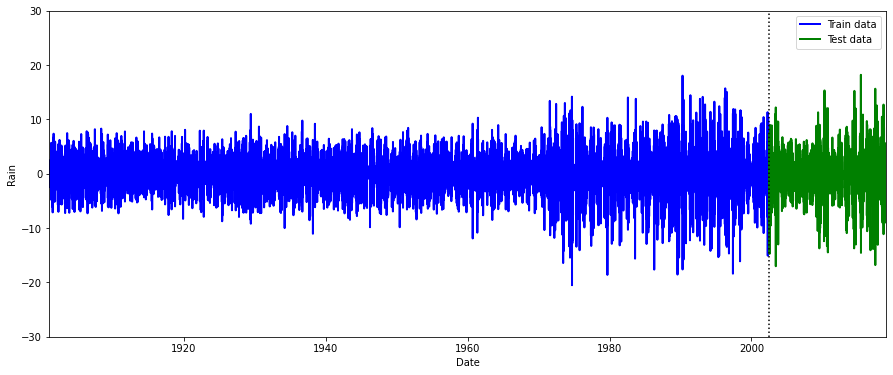

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(train_df['Date'], train_df['Rain'], linewidth=2, color='blue', label='Train data')
plt.plot(test_df['Date'], test_df['Rain'], linewidth=2, color='green', label='Test data')
plt.vlines(x=pd.to_datetime('2002-06-23', format='%Y-%m-%d'), ymin=-30, ymax=30, color = 'k', linestyle=':')
plt.margins(x=0, y=0)
plt.xlabel('Date')
plt.ylabel('Rain')
plt.legend()
plt.show()

In [19]:
time_step = 1
period = 1

scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_df.drop('Date',axis=1))

X_train = []
Y_train = []
for i in range(time_step,train_len):
    X_train.append(train_data_scaled[i-time_step:i,0])
    Y_train.append(train_data_scaled[i:i+period,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#Check
inp = df_stat.drop('Date',axis=1)
inp = np.array(inp[(len(inp)-test_len-time_step):])

inp = scaler.transform(inp)

X_test = []

for i in range(time_step,test_len+time_step):
    X_test.append(inp[i-time_step:i,0])        
X_test = np.array(X_test)
#print(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [20]:
from pmdarima.arima import auto_arima

In [21]:
"""step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)"""

"step_wise=auto_arima(train_y, \n exogenous= train_X,\n start_p=1, start_q=1, \n max_p=7, max_q=7, \n d=1, max_d=7,\n trace=True, \n error_action='ignore', \n suppress_warnings=True, \n stepwise=True)"

In [22]:
model_autoARIMA = auto_arima(df_stat['Rain'], test='adf', seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=183518.847, Time=3.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192195.664, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=190165.769, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=189017.441, Time=1.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=183514.986, Time=3.93 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=185924.729, Time=2.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=183517.190, Time=2.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=183479.002, Time=5.11 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=184020.620, Time=2.86 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=183428.200, Time=17.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=183497.675, Time=21.53 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=183482.998, Time=7.57 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=183471.140, Time=8.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=183384.837, Time=16.26 sec
 A

In [23]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                42980
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -91686.419
Date:                Mon, 07 Nov 2022   AIC                         183384.837
Time:                        10:15:59   BIC                         183436.848
Sample:                             0   HQIC                        183401.245
                              - 42980                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5125      0.008    197.294      0.000       1.497       1.528
ar.L2         -0.5371      0.007    -80.011      0.000      -0.550      -0.524
ar.L3         -0.0092      0.003     -2.726      0.006      -0.016      -0.003
ma.L1         -1.9053      0.007   -257.808      0.000      -1.920      -1.891
ma.L2          0.9098      0.007    130.558      0.000       0.896       0.923
sigma2         4.1535      0.014    290.156      0.000       4.125       4.182
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             69156.96
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

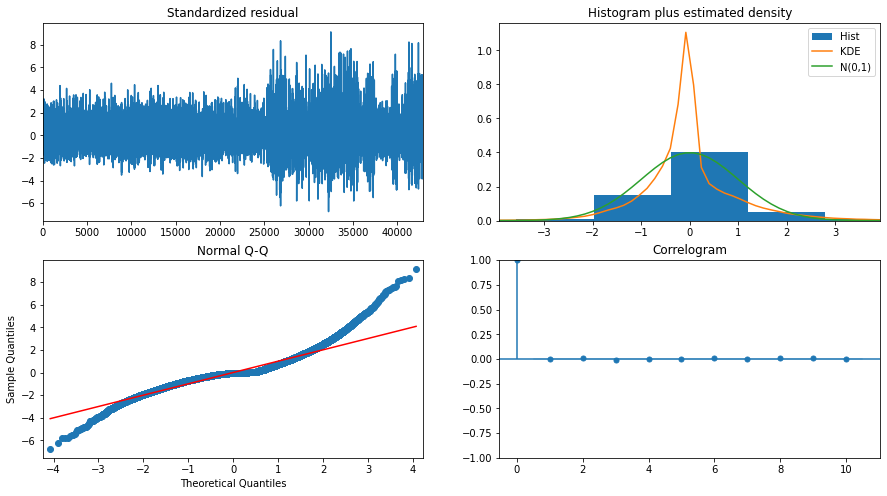

In [24]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
#model = SARIMAX(train_df['Rain'], order=(3, 0, 2))
model = ARIMA(train_df['Rain'], order=(3, 0, 2)) 
result = model.fit()
result.summary()

/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rain   No. Observations:                36963
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -77955.639
Date:                Mon, 07 Nov 2022   AIC                         155925.278
Time:                        10:17:46   BIC                         155984.902
Sample:                             0   HQIC                        155944.221
                              - 36963                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.002      0.741      0.458      -0.002       0.004
ar.L1          1.3597      0.029     46.822      0.000       1.303       1.417
ar.L2         -0.4691      0.018    -25.763      0.000      -0.505      -0.433
ar.L3         -0.0107      0.004     -2.463      0.014      -0.019      -0.002
ma.L1         -1.7305      0.029    -60.041      0.000      -1.787      -1.674
ma.L2          0.7464      0.027     27.467      0.000       0.693       0.800
sigma2         3.9152      0.016    251.916      0.000       3.885       3.946
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):             56363.81
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
pred = result.predict(start=len(train_df), end=len(df_stat)-1, dynamic=False)
predictions = pd.concat([test_df, pred], axis=1)

/Users/pranav/miniforge3/envs/rainfall/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
import math
def metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(actual, predicted)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mse)
    print('RMSE: '+str(rmse))
    mape = np.mean(np.abs(predicted-actual)/np.abs(actual))
    print('MAPE: '+str(mape))
    return mse, mae, rmse, mape

In [30]:
predictions.dropna(inplace=True)

In [31]:
predictions

,Rain,Date,predicted_mean
36964,0.233538,2002-06-25,0.919367
36965,1.721636,2002-06-26,0.610036
36966,3.736964,2002-06-27,0.383554
36967,-1.015702,2002-06-28,0.225675
36968,4.723872,2002-06-29,0.120553
...,...,...,...
42975,0.000000,2018-12-25,0.001200
42976,0.000000,2018-12-26,0.001200
42977,0.000000,2018-12-27,0.001200
42978,0.000000,2018-12-28,0.001200


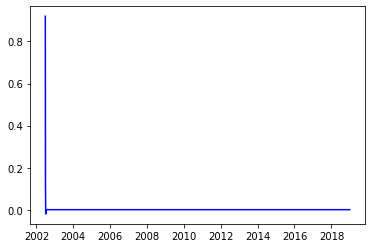

In [34]:
plt.plot(predictions['Date'], predictions['predicted_mean'], color='blue', label='Predicted')

In [32]:
mse, mae, rmse, mape = metrics(predictions['Rain'], predictions['predicted_mean'])

MSE: 6.776914779011095
MAE: 1.475167540471911
RMSE: 2.6032508098550733
MAPE: inf


Text(0, 0.5, 'Rain')

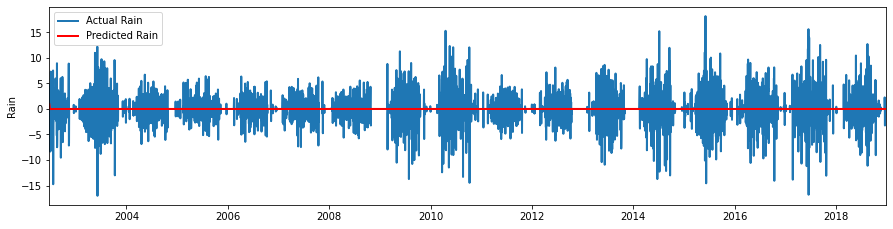

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(predictions['Date'], predictions['Rain'], label='Actual Rain', linewidth=2)
plt.plot(predictions['Date'], predictions['predicted_mean'], label='Predicted Rain', color='red', linewidth=2)
plt.legend()
plt.margins(x=0)
plt.ylabel('Rain')